# 2. DATASET DESCRIPTION
---

### 2.0. Load libraries and dataset

In [1]:
# LIBRARIES
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# DATASET
total_data = pd.read_csv('../data/interim/player_match_data.csv')

### 2.1. Data description

In [2]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946025 entries, 0 to 946024
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   adr           946025 non-null  object 
 1   assists       946025 non-null  int64  
 2   deaths        946025 non-null  int64  
 3   fkdiff        946025 non-null  int64  
 4   hs            946025 non-null  int64  
 5   kdratio       946025 non-null  object 
 6   kills         946025 non-null  int64  
 7   rating        946025 non-null  float64
 8   match_id      946025 non-null  int64  
 9   player_id     946025 non-null  int64  
 10  team_1_id     946025 non-null  int64  
 11  team_1_name   946025 non-null  object 
 12  team_1_score  946025 non-null  int64  
 13  team_2_id     946025 non-null  int64  
 14  team_2_name   946025 non-null  object 
 15  team_2_score  946025 non-null  int64  
 16  team_name     946025 non-null  object 
 17  data_unix     946025 non-null  int64  
 18  map 

The clean dataset has 946.025 rows and 24 columns. 

- 17 out of 24 columns are **numerical** values columns.
- 6 out of 24 columns are **object** values columns.
- the column left is a **float** value column.
- There is no predictor yet to analyze. 
- There is no null values.

### 2.2. Data Measures

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,946025.000,4.218,2.491,0.000,2.000,4.000,6.000,25.000
deaths,946025.000,17.723,4.818,0.000,15.000,18.000,20.000,69.000
fkdiff,946025.000,-0.004,2.441,-13.000,-2.000,0.000,2.000,15.000
hs,946025.000,8.021,3.882,0.000,5.000,8.000,10.000,39.000
kills,946025.000,17.680,6.344,0.000,13.000,17.000,22.000,79.000
rating,946025.000,1.049,0.343,0.000,0.810,1.030,1.260,3.450
match_id,946025.000,66957.492,31130.436,12838.000,40066.000,66914.000,93775.000,121306.000
player_id,946025.000,9786.233,4810.605,1.000,7463.000,9342.000,12849.000,21025.000
team_1_id,946025.000,7328.954,1815.925,3180.000,5988.000,7182.000,8637.000,11158.000
team_1_score,946025.000,13.190,4.468,0.000,10.000,16.000,16.000,46.000


After watching the results, seems that there are no 0 values that could be a wrong data extraction. All data seems to be OK. It will deeply analyzed later.

### 2.3. Data duplicates

In [4]:
total_data.drop(["match_id"],axis=1).duplicated().sum()
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.shape

(945865, 25)

160 Columns were marked as duplicate and deleted, leaving a total of 945.865 rows.

### 2.4. Review

In [5]:
total_data.head(3)

,adr,assists,deaths,fkdiff,hs,kdratio,kills,rating,match_id,player_id,...,team_2_score,team_name,data_unix,map,hour,day,week,month,year,weekday
0,163.2,3,10,1,10,90.0%,32,2.440,32227,5736,...,16,g3x,1467476700000,Train,13,2,26,7,2016,5
1,81.0,3,6,1,5,75.0%,17,1.550,32227,2532,...,16,g3x,1467476700000,Train,13,2,26,7,2016,5
2,77.6,3,10,1,11,75.0%,16,1.410,32227,7382,...,16,g3x,1467476700000,Train,13,2,26,7,2016,5


### 2.5. Plot numerical histograms

For the purpose of numerical analysis, it appears that the only viable variables for graphical representation pertain to the statistics associated with the player. This includes data points such as kills, assists, and other performance metrics.

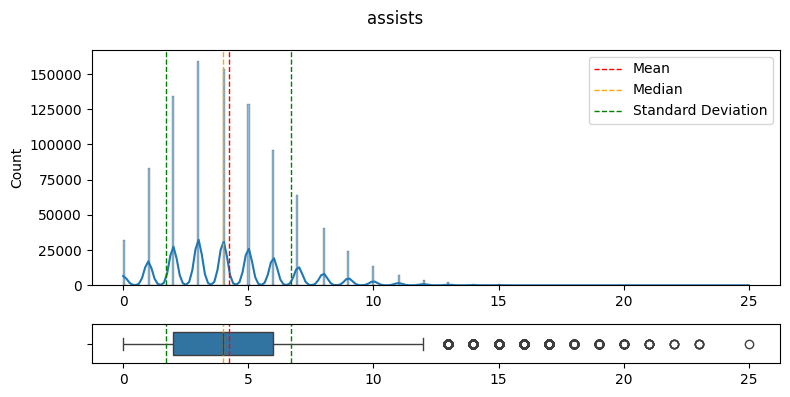

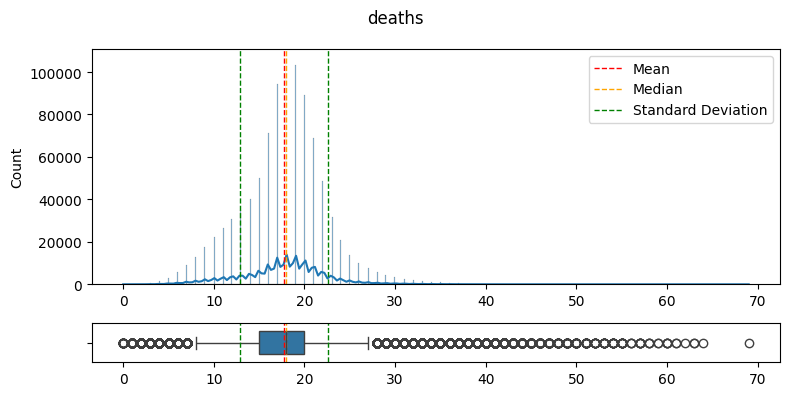

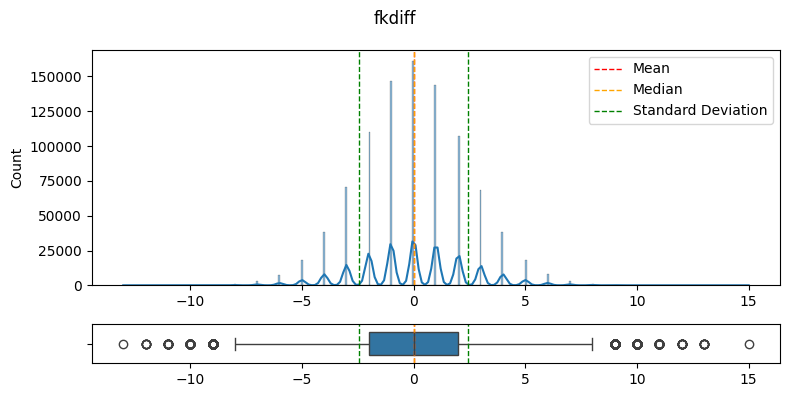

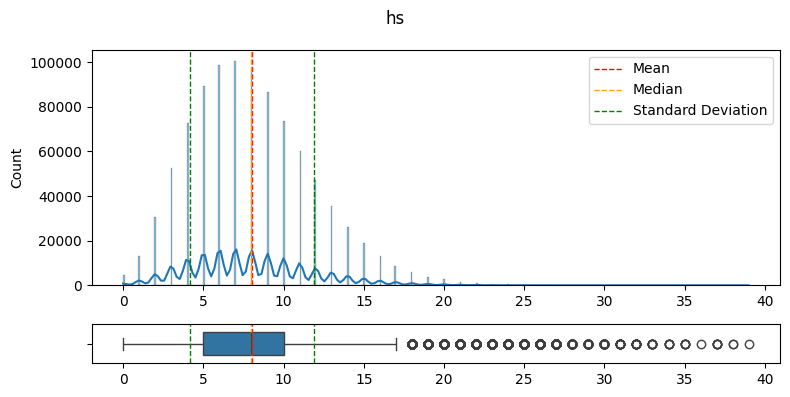

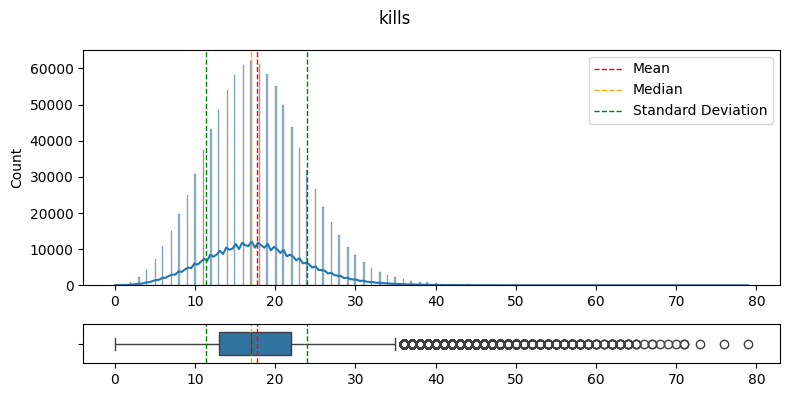

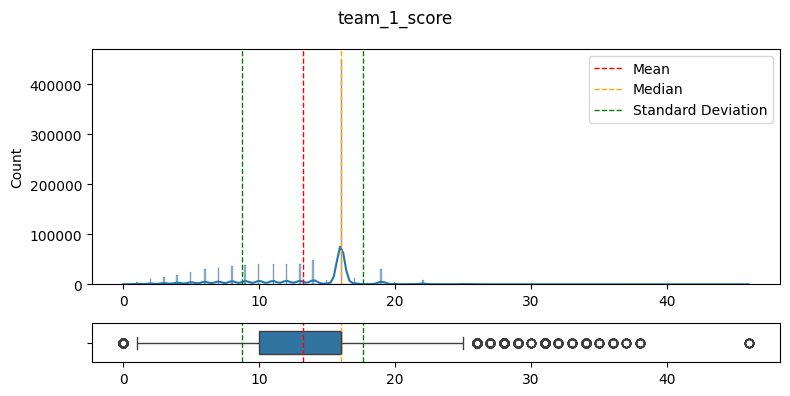

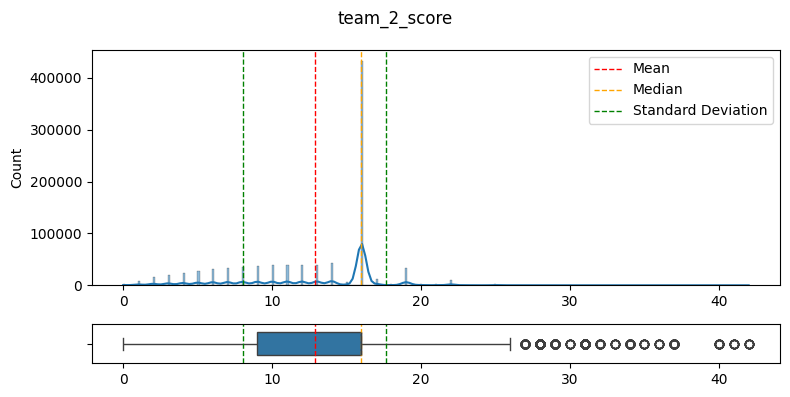

In [6]:
def plot_numerical_data(dataframe):
    numerical_columns = dataframe[[
        'assists',
        'deaths',
        'fkdiff',
        'hs',
        'kills',
        'team_1_score',
        'team_2_score'
    ]].columns

    for column in numerical_columns:
        fig, axis = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [6, 1]}) 
        # Calculate mean, median, and standard deviation
        mean_val = np.mean(dataframe[column])
        median_val = np.median(dataframe[column])
        std_dev = np.std(dataframe[column])

        # Create a multiple subplots with histograms and box plots
        sns.histplot(ax=axis[0], data=dataframe, kde=True, x=column).set(xlabel=None)
        axis[0].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label='Mean')
        axis[0].axvline(median_val, color='orange', linestyle='dashed', linewidth=1, label='Median')
        axis[0].axvline(mean_val + std_dev, color='green', linestyle='dashed', linewidth=1, label='Standard Deviation')
        axis[0].axvline(mean_val - std_dev, color='green', linestyle='dashed', linewidth=1)  

        sns.boxplot(ax=axis[1], data=dataframe, x=column, width=0.6).set(xlabel=None)
        axis[1].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label='Mean')
        axis[1].axvline(median_val, color='orange', linestyle='dashed', linewidth=1, label='Median')
        axis[1].axvline(mean_val + std_dev, color='green', linestyle='dashed', linewidth=1)
        axis[1].axvline(mean_val - std_dev, color='green', linestyle='dashed', linewidth=1)  

        axis[0].legend()  
        fig.suptitle(column)
        plt.tight_layout()
        plt.show()

# Assuming total_data is your DataFrame
plot_numerical_data(total_data)

Upon examination, it is evident that the distribution of the player's statistics, such as kills and assists, predominantly **adheres to a normal distribution**. This observation potentially signifies that these particular columns could be instrumental in facilitating accurate predictions.

### 2.6. Plot categoric histograms

For the categorical analysis, it appears that the only variable that can be graphically represented is the **map** variable.

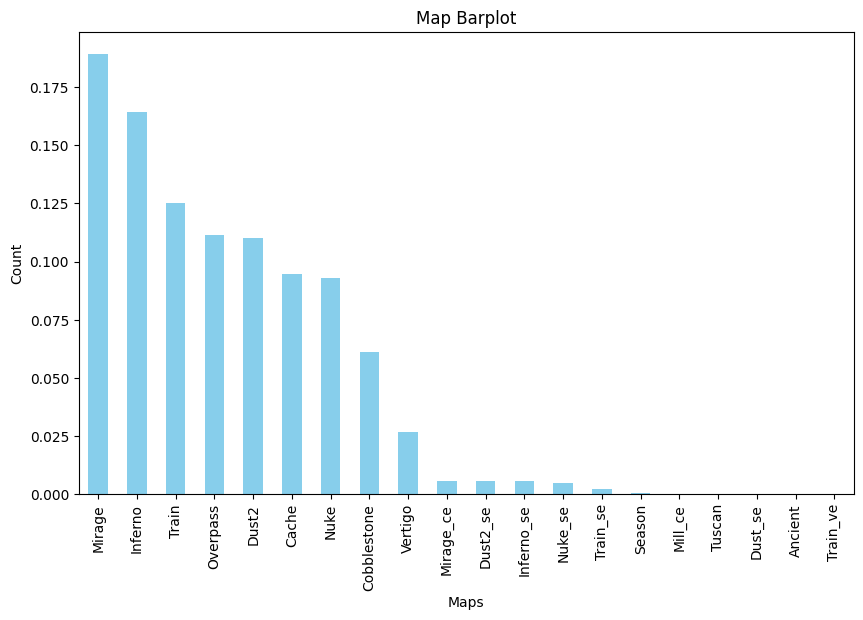

In [7]:
import matplotlib.pyplot as plt
# Assuming total_data is your DataFrame
# Make sure to replace 'map' with the actual column name in your DataFrame
plt.figure(figsize=(10, 6))
total_data['map'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Map Barplot')
plt.xlabel('Maps')
plt.ylabel('Count')
plt.show()


The analysis suggests that, despite the availability of 20 distinct maps for gameplay, the majority of matches were conducted on **fewer than nine of these**. This could be indicative of player preferences or certain strategic advantages associated with these specific maps.

The suffixes **“_ce” or “_se”** denote the **“Professional”** versions of the original maps. These versions have been optimized by removing elements such as fog, particles, debris, and props. This is done to maximize Frames Per Second (FPS) and improve visibility, thereby enhancing the gaming experience.*

*<small>https://www.youtube.com/watch?v=Z42N1gTnsZE</small>

---
## Conclusions

1. The dataset consists of 945,865 rows and 24 columns, representing the records of matches played by different players in a video game. The columns include numerical, object, and float values, reflecting various aspects of the game, such as player statistics, map names, and match duration. 

2. The analysis reveals that there are no null or 0 values. However, further analysis will indicate if all rows have correct values.

3. The preliminary analysis reveals some interesting patterns and insights about the dataset. For instance, the player statistics, such as kills and assists, follow a normal distribution, suggesting that they could be useful features for predicting the match outcome. Moreover, the analysis shows that the players tend to play on a limited number of maps.